----
# Laboratorium 4 - Transmitancja i charakterystyki częstotliwościowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

---- 
## 0. Zagadnienia do opanowania przed zajęciami
---- 
### 0.1. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.2. Przydatne informacje:
Funkcje z biblioteki *sympy* potrzebne do zrealizowania ćwiczenia:  
`sympy.Symbol, sympy.I, sympy.re(), sympy.im(), sympy.Abs, sympy.arg`

Dokumentacja i opisy poszczególnych funkcji *sympy*:

- https://docs.sympy.org/latest/tutorial/gotchas.html#symbols  
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html



---- 
## Transmitancje
---- 

$$ H1(s) = {{s} \over {5s + 1}} $$  
$$ H2(s) = {{2} \over {s + 3}} $$  
$$ H3(s) = {{s + 2} \over {s + 3}} $$  
$$ H4(s) = {{s + 2} \over {s + 1}} $$  
$$ H5(s) = {{2s + 3} \over {2s + 4}} $$
$$ H6(s) = {{1} \over {2s^2 + s + 1}} $$    

In [1]:
%matplotlib inline
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)

----
## 1. Charakterystyka amplitudowa i fazowa układu - metoda analityczna
----
### Zadanie: Wyznacz i wyświetl matematyczną postać charakterystyki amplitudowej i fazowej dla układu o podanej transmitancji operatorowej.
Podpowiedź: użyj `sympy.I`, `sympy.re()`, `sympy.im()`  

In [2]:
#declare symbolic variable 'ω' (omega)
ω = sympy.Symbol('ω', real = True)
#declare symbolic variable 's'
s = 0 + sympy.I*ω #s = i * w

# transmitancja układów
H1 = s/(5*s + 1)
display(H1)
H2 = 2/(s+3)
display(H2)
H3 = (s+2)/(s+3)
display(H3)
H4 = (s+2)/(s+1)
display(H4)
H5 = ((2*s)+3)/(2*s+4)
display(H5)
H6 = 1/(2*s**2+s+1)
display(H6)

#Wybór konkretnego H
H = H6

# wyznaczenie części rzeczywistej i urojonej transmitancji
display("aktualne H: ", H)
real = sympy.re(H)
display("czesc rzeczywista: ", real)
imaginary = sympy.im(H)
display("czesc urojona: ", imaginary)
# wyznaczenie modułu i argumentu transmitancji
modul = sympy.sqrt(real**2 + imaginary**2) #modul czyli pierwiastek(Re{H}^2 + Im{H}^2), funkcja do liczenia modulu
faza_1 = sympy.atan(imaginary/real) #nie zawsze zadziała, coś tam ćwiartki, trzeba 180 stopni dodać
faza = sympy.atan2(imaginary, real) #to działa
display('modul= ', modul)
display('faza= ', faza)
display('faza_1= ', faza_1) #to średnio działa



I*ω/(5*I*ω + 1)

2/(I*ω + 3)

(I*ω + 2)/(I*ω + 3)

(I*ω + 2)/(I*ω + 1)

(2*I*ω + 3)/(2*I*ω + 4)

1/(-2*ω**2 + I*ω + 1)

'aktualne H: '

1/(-2*ω**2 + I*ω + 1)

'czesc rzeczywista: '

(1 - 2*ω**2)/(ω**2 + (1 - 2*ω**2)**2)

'czesc urojona: '

-ω/(ω**2 + (1 - 2*ω**2)**2)

'modul= '

sqrt(ω**2/(ω**2 + (1 - 2*ω**2)**2)**2 + (1 - 2*ω**2)**2/(ω**2 + (1 - 2*ω**2)**2)**2)

'faza= '

atan2(-ω/(ω**2 + (1 - 2*ω**2)**2), (1 - 2*ω**2)/(ω**2 + (1 - 2*ω**2)**2))

'faza_1= '

-atan(ω/(1 - 2*ω**2))

----
## 2. Charakterystyka amplitudowa i fazowa układu - metoda analityczna - wykres
----
### Zadanie: Sporządzić wykresy wyznaczonych wcześniej charakterystyk amplitudowej i fazowej
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.logspace`, `sympy.lambdify`, `matplotlib.axes.Axes.loglog`, `matplotlib.axes.Axes.semilogx`

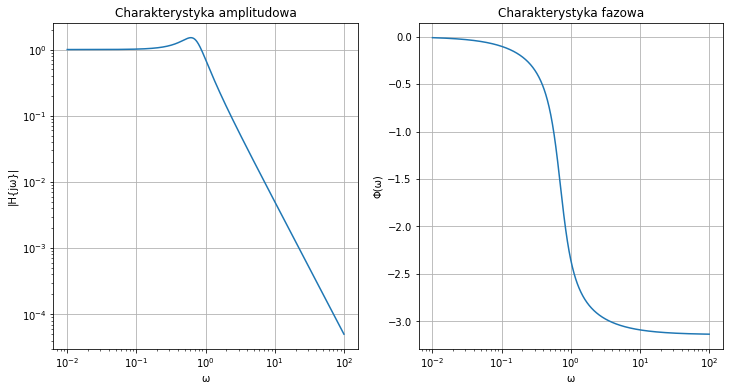

In [3]:
#wykres charakterystyki amplitudowej i charakterystyki fazowej, obliczenia symbliczne na wzorach
w = np.logspace(-2,2,1000) #linspace ale skala logarytmiczna
Mod = sympy.lambdify(ω, modul, 'numpy')(w) #wektor próbek widma amplitudowego, w podstawiamy do funkcji modul
Phase = sympy.lambdify(ω, faza, 'numpy')(w) #wektor próbek widma amplitudowego, w podstawiamy do funkcji faza

fig, axs = plt.subplots(1,2, figsize=default_figsize) #dwa wykresy
axs[0].loglog(w, Mod) #rysowanie widma amplitudowego (ω, |H(jω)|), skala logarytmiczna
axs[0].set_title("Charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H{jω}|")
axs[0].grid()
axs[1].semilogx(w, Phase) #rysowanie widma amplitudowego (w, Φ(ω))
axs[1].set_title("Charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("Φ(ω)")
axs[1].grid()




----
## 3. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna
----
### Zadanie: Sporządzić wykresy charakterystyk amplitudowej i fazowej korzystając jedynie z biblioteki `numpy`
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: $ H(s) = {{B(s)} \over {A(s)}} $
Podpowiedź: wylicz niezależnie wartości dla licznika i mianownika transmitancji  
Podpowiedź: użyj `numpy.logspace`, `numpy.poly1d`, `numpy.abs`, `numpy.angle`, `1j`

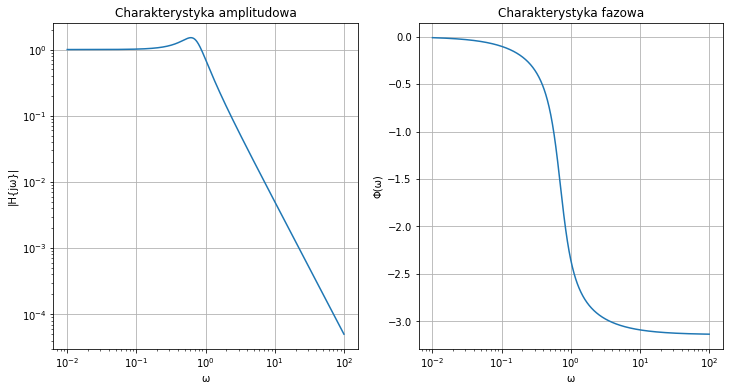

In [4]:
#kolejny wykres charakterystyki amplitudowej i fazowej, liczmy dla H1=s/(5s+1), numerycznie policzone bez wzorow
w = np.logspace(-2,2,1000) #linspace ale skala logarytmiczna
Licznik_B = np.poly1d([1]) #wielomian z licznika, wzory wielomainów wl(s) = 1*s, wm(s) = 5*s + 1, pamiętać o 0 przy wyrazie wolnym
Mianownik_A = np.poly1d([2,1,1])
s = w * 1j
H = Licznik_B(s)/Mianownik_A(s)
Mod = np.abs(H)
Phase = np.angle(H)

fig, axs = plt.subplots(1,2, figsize=default_figsize) #dwa wykresy
axs[0].loglog(w, Mod) #rysowanie widma amplitudowego (ω, |H(jω)|), skala logarytmiczna
axs[0].set_title("Charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H{jω}|")
axs[0].grid()
axs[1].semilogx(w, Phase) #rysowanie widma amplitudowego (w, Φ(ω))
axs[1].set_title("Charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("Φ(ω)")
axs[1].grid()




----
## 4. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna z użyciem funkcji `freqs` z biblioteki `scipy`
----
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj funkcji `scipy.signal.freqs` do wyliczenia wartości transmitancji. 

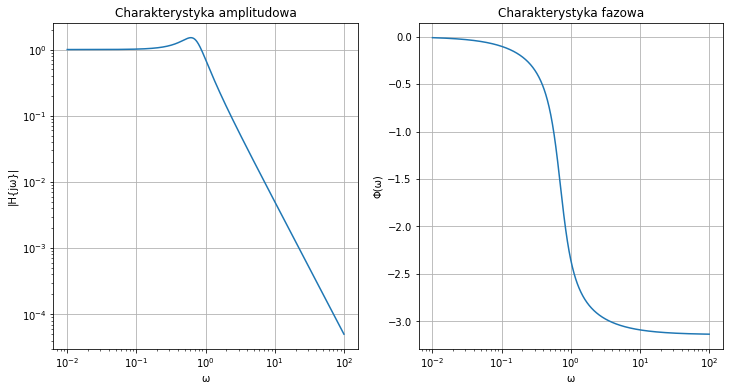

In [5]:
#jeszcze jeden wykres charakterystyki amplitudowej i fazowej
w = np.logspace(-2,2,1000) #linspace ale skala logarytmiczna
Licznik_B = np.poly1d([1]) #wielomian z licznika, wzory wielomainów wl(s) = 1*s, wm(s) = 5*s + 1, pamiętać o 0 przy wyrazie wolnym
Mianownik_A = np.poly1d([2,1,1])
#funkcja scipy.signal.freqs zwraca transmitancje [1], oznacza że wybiera parametr h, czyli pierwszych z dwóch liczone od 0
H = scipy.signal.freqs(Licznik_B,Mianownik_A,w)[1] #b - mianownik transmitancji, a - licznik transmitancji, w - cześtotliwości dla jakich rysujemy, wektor
Mod = np.abs(H)
Phase = np.angle(H)


fig, axs = plt.subplots(1,2, figsize=default_figsize) #dwa wykresy
axs[0].loglog(w, Mod) #rysowanie widma amplitudowego (ω, |H(jω)|), skala logarytmiczna
axs[0].set_title("Charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H{jω}|")
axs[0].grid()
axs[1].semilogx(w, Phase) #rysowanie widma amplitudowego (w, Φ(ω))
axs[1].set_title("Charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("Φ(ω)")
axs[1].grid()



---- 
## 5. Charakterystyka amplitudowo-fazowa układu
---- 
### Zadanie: Wyznacz część rzeczywistą oraz część urojoną transmitancji układu. Sporządzić wykres charakterystyki amplitudowo-fazowej dla układu o zadanej transmitancji.
Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.real()`, `numpy.imag()`

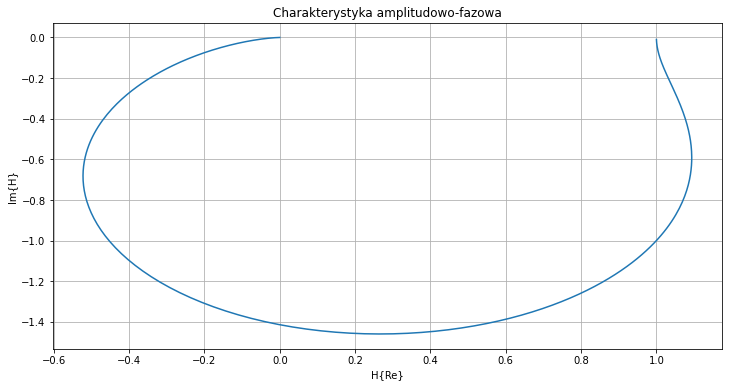

In [25]:
H = scipy.signal.freqs(Licznik_B,Mianownik_A,w)[1]
H_real = np.real(H)
H_imag = np.imag(H)

fig, axs = plt.subplots(1,1, figsize=default_figsize) #dwa wykresy
axs.plot(H_real, H_imag) #rysowanie widma amplitudowego (ω, |H(jω)|), skala logarytmiczna
axs.set_title("Charakterystyka amplitudowo-fazowa")
axs.set_xlabel("H{Re}")
axs.set_ylabel("Im{H}")
axs.grid()

